# 

In [10]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt

In [90]:
def read_csv(filename):
    df = pd.read_csv(f"dat/{filename}")
    df = clean_columns(df)
    return df

sb_ratings = read_csv('super-bowl-ratings.csv')
sb_dat = read_csv('superbowl_2.csv')
sb_off_stats = read_csv('superbowloffensivestats.csv')
sb_mvps = read_csv('mvpsb.csv')

to_short_name = {
    'Baltimore Colts': "IND",
    'Baltimore Ravens': "BAL",
    'Chicago Bears': "CHI",
    'Dallas Cowboys': "DAL",
    'Denver Broncos': "DEN",
    'Green Bay Packers': "GNB",
    'Indianapolis Colts': "IND",
    'Kansas City Chiefs':"KAN",
    'Los Angeles Raiders': "LAR",
    'Los Angeles Rams': "RAM", 
    'Miami Dolphins': "MIA",
    'New England Patriots': "NWE",
    'New Orleans Saints': "NOR",
    'New York Giants': "NYG",
    'New York Jets': "NYJ",
    'Oakland Raiders': "OAK",
    'Philadelphia Eagles': "PHI",
    'Pittsburgh Steelers': "PIT",
    'San Francisco 49ers': "SFO",
    'Seattle Seahawks': "SEA",
    'St. Louis Rams': "RAM",
    'Tampa Bay Buccaneers': "TAM",
    'Washington Redskins': "WAS",
    'Arizona Cardinals' : "ARI",
    'Atlanta Falcons': "ATL",
    'Buffalo Bills': "BUF",
    'Carolina Panthers': "CAR",
    'Cincinnati Bengals': "CIN",
    'Minnesota Vikings': "MIN",
    'San Diego Chargers': "SDG",
    'Tennessee Titans': "TEN"
}
to_short_names_mvps = {
    'Baltimore' : "BAL",
    'Chicago' : "CHI",
    'Dallas': "DAL",
    'Denver': "DEN",
    'Green Bay': "GNB",
    'Indianapolis': "IND",
    'Kansas City': "KAN",
    'Los Angeles Raiders': "LAR",
    'Miami': "MIA",
    'New England': "NWE",
    'New Orleans': "NOR",
    'New York Giants': "NYG",
    'New York Jets': "NYJ",
    'Oakland': "OAK",
    'Philadelphia': "PHI",
    'Pittsburgh': "PIT",
    'San Francisco': "SFO",
    'Seattle': "SEA",
    'St. Louis': "RAM",
    'Tampa Bay': "TAM",
    'Washington': "WAS"
}

sb_dat.replace(to_replace=to_short_name.keys(), value=to_short_name.values(), inplace=True)
sb_mvps.replace(to_replace=to_short_names_mvps.keys(), value=to_short_names_mvps.values(), inplace=True)
print(sb_off_stats.columns)

Index(['year', 'team', 'completions', 'pass_attempts', 'passing_yards',
       'passing_td', 'interception', 'times_sacked', 'sack_yards',
       'rush_attempts', 'rushing_td', 'receptions', 'receiving_yards',
       'receiving_td', 'fumbles_lost', 'winner', 'rushing_yards'],
      dtype='object')


In [91]:
# group data
#sb_off_stats = sb_off_stats.groupby(["year", "team"])
import csv

sb_off_stats["pass_completion"] = sb_off_stats["completions"] / sb_off_stats["pass_attempts"]
sb_off_stats["turnovers"] = sb_off_stats["interception"] + sb_off_stats["fumbles_lost"]
sb_off_stats["yards_per_attempt"] = sb_off_stats["passing_yards"] / sb_off_stats["pass_attempts"]

sb_off_stats = sb_off_stats[["year", "team", "winner", "pass_completion", "turnovers", "yards_per_attempt", "rushing_yards", "times_sacked"]]

for col in sb_off_stats.columns:
    sb_off_stats[col] = sb_off_stats[col].fillna(0)
print(sb_off_stats)

sb_off_stats.to_csv('stats.csv', index=False)

     year team  winner  pass_completion  turnovers  yards_per_attempt  \
0    2021  CIN       0         0.676471        0.0           7.911765   
1    2021  LAR       1         0.634146        2.0           6.902439   
2    2020  KAN       0         0.530612        2.0           5.510204   
3    2020  TAM       1         0.724138        0.0           6.931034   
4    2019  KAN       1         0.619048        2.0           6.809524   
..    ...  ...     ...              ...        ...                ...   
107  1968  NYJ       1         0.586207        1.0           7.103448   
108  1967  GNB       1         0.541667        0.0           8.416667   
109  1967  OAK       0         0.441176        1.0           6.117647   
110  1966  GNB       1         0.666667        1.0          10.416667   
111  1966  KAN       0         0.531250        1.0           7.125000   

     rushing_yards  times_sacked  
0               79             7  
1               43             2  
2              107

AttributeError: '_csv.writer' object has no attribute 'write'

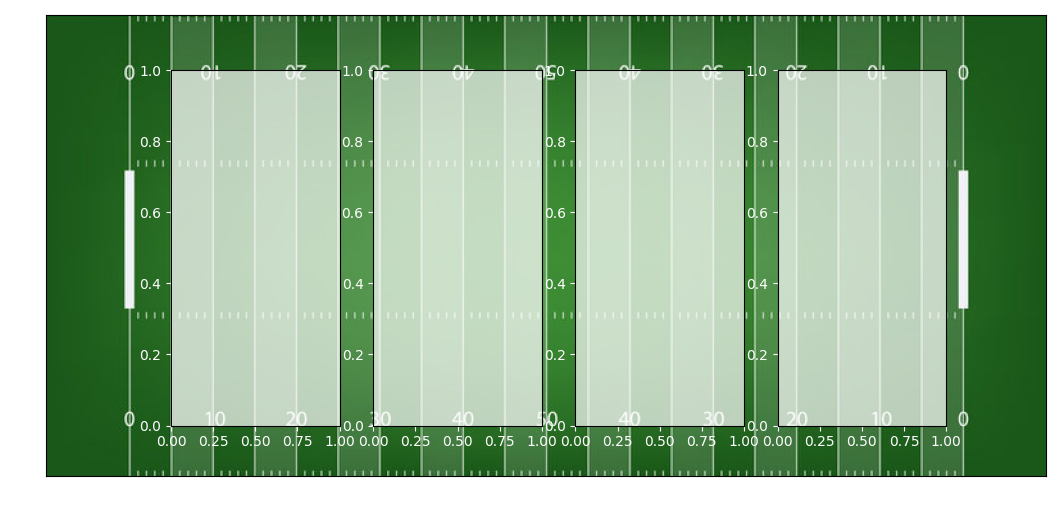

In [27]:
import matplotlib


matplotlib.rcParams.update({'xtick.color': "white",
                     'ytick.color': "white",
                     'axes.labelcolor': "white"}) 
bg = plt.imread("nfl.jpg")

width = 10
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(width, width * bg.shape[0] / bg.shape[1]))
for ax in np.ravel(axs):
    ax.patch.set_alpha(0.7)



background_ax = plt.axes([0, 0, 1, 1]) # create a dummy subplot for the background
background_ax.set_zorder(-1) # set the background subplot behind the others
background_ax.imshow(bg, aspect='auto') # show the backgroud 

